In [12]:
import numpy as np
import itertools

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [14]:
def calculate_weight_set_dimensions(dimensions):
    a, b = itertools.tee(dimensions[::-1])
    next(b, None)
    weight_set_dimensions = list(zip(a, b))[::-1]
    
    return weight_set_dimensions

In [15]:
def initialise_weights(dimensions):
    # For single hidden layer neural network there will be 2 sets of weights;
    # 1- one set to hidden layer
    # 2- one set from hidden layer
    # number of weight sets = no_of_hidden_layers + 1
    weight_dims = calculate_weight_set_dimensions(dimensions)
    no_of_weight_sets = len(weight_dims)
    
    # W_set holds weight sets such as w1, w2, w3 etc.
    W = np.empty_like(range(no_of_weight_sets), dtype=object)
    B = np.empty_like(range(no_of_weight_sets), dtype=object)
    for index, (row, column) in enumerate(weight_dims):
        W[index] = np.random.rand(row, column)
        B[index] = np.random.rand()
    return W, B

In [16]:
def forwardpass(X, W, B, dimensions):
    weight_dims = calculate_weight_set_dimensions(dimensions)
    no_of_weight_sets = len(weight_dims)

    Z = np.empty_like(range(no_of_weight_sets + 1), dtype=object)
    A = np.empty_like(range(no_of_weight_sets + 1), dtype=object)
    A[0] = X
    Z[0] = None
    for index in range(no_of_weight_sets):
        Z[index + 1] = W[index] @ A[index] + B[index]
        A[index + 1] = sigmoid(Z[index + 1])
    return A, Z

In [17]:
def calculate_error(Y, Y_hat):
    m = Y.shape[1]
    return np.sum(0.5 * np.square(Y - Y_hat)) / m

In [18]:
def calculate_delta_final(Y, A, Z):
    return (A[-1] - Y) * (sigmoid_prime(Z[-1]))

In [19]:
def backpropagation(A, Z, Y, B, W, dimensions, alfa):
    m = Y.shape[1]
    weight_dims = calculate_weight_set_dimensions(dimensions)
    no_of_weight_sets = len(weight_dims)

    delta_final = calculate_delta_final(Y, A, Z)
    delta = np.empty_like(range(no_of_weight_sets), dtype=object)
    delta[-1] = delta_final

    gradient_W = np.empty_like(range(no_of_weight_sets), dtype=object)
    gradient_B = np.empty_like(range(no_of_weight_sets), dtype=object)
    
    # here Z[index+1] is passed instead of Z[index] this is because Z[0] is none.
    # So Z[index+1] is effectively Z[index].
    for index in reversed(range(no_of_weight_sets - 1)): # 1 is substracted as delta_final is calculated above
        delta[index] = W[index + 1].T @ delta[index + 1] * sigmoid_prime(Z[index + 1])
    
    # calculate the gradient
    for index in range(no_of_weight_sets):
        gradient_W[index] = (delta[index] @ A[index].T) / m
        gradient_B[index] = delta[index]

    #update the weights
    for index, _ in enumerate(W):
        W[index] = W[index] - alfa * gradient_W[index]
        B[index] = B[index] - alfa * gradient_B[index]
    return W, B

In [20]:
def fit(no_of_iterations, dimensions, X, Y, alfa):
    W, B = initialise_weights(dimensions)

    for iteration in range(no_of_iterations + 1):
        A, Z = forwardpass(X, W, B, dimensions)
        W, B = backpropagation(A, Z, Y, B, W, dimensions, alfa)
        if iteration % 100 == 0 or iteration == no_of_iterations:
            print("iteration %s - loss %.10f" %(iteration, calculate_error(Y, A[-1])))
            
    return W, B

In [ ]:
X = np.array([0.05, 0.10]).reshape((2, 1))
Y = np.array([0.01, 0.99]).reshape((2, 1))

In [ ]:
dimensions = [2,2,2]

W, B = fit(20000, dimensions, X, Y, 0.5)

In [ ]:
A, Z = forwardpass(X, W, B, dimensions)

In [ ]:
A[-1][0][0]

In [ ]:
A[-1][1][0]

In [ ]:
A[-1]

# Testing with Benchmark Datasets - Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,[0,2]].T
y = data.target
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
Y = lb.fit_transform(y)
Y = Y.T

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
dimensions = [X.shape[0], 6, 4, 3]

W, B = fit(50000, dimensions, X, Y, 0.01)

In [ ]:
A, Z = forwardpass(X, W, B, dimensions)
y_hat = A[-1]

for index,(act, predicted) in enumerate(zip(y, np.argmax(A[-1], axis = 0))):
    print("index: %s___actual %s__predicted %s" %(index, act, predicted))

# Make Moons dataset

In [83]:
from sklearn.datasets import make_moons
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
x,y =make_moons(n_samples=1500, noise=.05)
X = x.T
lb = preprocessing.LabelBinarizer()
Y = lb.fit_transform(y)
y_next = np.where(y==0,1,0)
Y = Y.T
Y = list(Y)
Y.append(y_next)
Y = np.array(Y)

In [85]:
dimensions = [X.shape[0], 6, 4, Y.shape[0]]

W, B = fit(50000, dimensions, X, Y, 0.3)

iteration 0 - loss 0.3998959591
iteration 100 - loss 0.0292101793
iteration 200 - loss 0.0125920893
iteration 300 - loss 0.0077817679
iteration 400 - loss 0.0055690936
iteration 500 - loss 0.0043131543
iteration 600 - loss 0.0035088282
iteration 700 - loss 0.0029517108
iteration 800 - loss 0.0025439860
iteration 900 - loss 0.0022331775
iteration 1000 - loss 0.0019886900
iteration 1100 - loss 0.0017915174
iteration 1200 - loss 0.0016292478
iteration 1300 - loss 0.0014934408
iteration 1400 - loss 0.0013781617
iteration 1500 - loss 0.0012791189
iteration 1600 - loss 0.0011931335
iteration 1700 - loss 0.0011178022
iteration 1800 - loss 0.0010512746
iteration 1900 - loss 0.0009921036
iteration 2000 - loss 0.0009391414
iteration 2100 - loss 0.0008914661
iteration 2200 - loss 0.0008483292
iteration 2300 - loss 0.0008091163
iteration 2400 - loss 0.0007733188
iteration 2500 - loss 0.0007405120
iteration 2600 - loss 0.0007103384
iteration 2700 - loss 0.0006824954
iteration 2800 - loss 0.00065672

iteration 23300 - loss 0.0000730877
iteration 23400 - loss 0.0000727686
iteration 23500 - loss 0.0000724522
iteration 23600 - loss 0.0000721385
iteration 23700 - loss 0.0000718276
iteration 23800 - loss 0.0000715192
iteration 23900 - loss 0.0000712135
iteration 24000 - loss 0.0000709104
iteration 24100 - loss 0.0000706098
iteration 24200 - loss 0.0000703118
iteration 24300 - loss 0.0000700162
iteration 24400 - loss 0.0000697231
iteration 24500 - loss 0.0000694324
iteration 24600 - loss 0.0000691442
iteration 24700 - loss 0.0000688582
iteration 24800 - loss 0.0000685747
iteration 24900 - loss 0.0000682934
iteration 25000 - loss 0.0000680144
iteration 25100 - loss 0.0000677377
iteration 25200 - loss 0.0000674632
iteration 25300 - loss 0.0000671909
iteration 25400 - loss 0.0000669208
iteration 25500 - loss 0.0000666528
iteration 25600 - loss 0.0000663870
iteration 25700 - loss 0.0000661232
iteration 25800 - loss 0.0000658616
iteration 25900 - loss 0.0000656020
iteration 26000 - loss 0.000

iteration 46200 - loss 0.0000363746
iteration 46300 - loss 0.0000362947
iteration 46400 - loss 0.0000362151
iteration 46500 - loss 0.0000361359
iteration 46600 - loss 0.0000360570
iteration 46700 - loss 0.0000359785
iteration 46800 - loss 0.0000359003
iteration 46900 - loss 0.0000358224
iteration 47000 - loss 0.0000357449
iteration 47100 - loss 0.0000356677
iteration 47200 - loss 0.0000355908
iteration 47300 - loss 0.0000355143
iteration 47400 - loss 0.0000354381
iteration 47500 - loss 0.0000353622
iteration 47600 - loss 0.0000352867
iteration 47700 - loss 0.0000352114
iteration 47800 - loss 0.0000351365
iteration 47900 - loss 0.0000350619
iteration 48000 - loss 0.0000349876
iteration 48100 - loss 0.0000349136
iteration 48200 - loss 0.0000348399
iteration 48300 - loss 0.0000347666
iteration 48400 - loss 0.0000346935
iteration 48500 - loss 0.0000346208
iteration 48600 - loss 0.0000345483
iteration 48700 - loss 0.0000344762
iteration 48800 - loss 0.0000344043
iteration 48900 - loss 0.000

In [90]:
A, Z = forwardpass(X, W, B, dimensions)
y_hat = A[-1]

for index,(act, predicted) in enumerate(zip(y, np.argmax(A[-1], axis = 0))):
    if predicted == 1:
        predicted = 0
    else:
        predicted = 1
    if predicted != act:
        print("NO MATCH!")
    print("index: %s___actual %s__predicted %s" %(index, act, predicted))

index: 0___actual 1__predicted 1
index: 1___actual 1__predicted 1
index: 2___actual 1__predicted 1
index: 3___actual 1__predicted 1
index: 4___actual 0__predicted 0
index: 5___actual 0__predicted 0
index: 6___actual 1__predicted 1
index: 7___actual 1__predicted 1
index: 8___actual 0__predicted 0
index: 9___actual 1__predicted 1
index: 10___actual 0__predicted 0
index: 11___actual 0__predicted 0
index: 12___actual 1__predicted 1
index: 13___actual 1__predicted 1
index: 14___actual 1__predicted 1
index: 15___actual 1__predicted 1
index: 16___actual 1__predicted 1
index: 17___actual 1__predicted 1
index: 18___actual 1__predicted 1
index: 19___actual 0__predicted 0
index: 20___actual 0__predicted 0
index: 21___actual 1__predicted 1
index: 22___actual 1__predicted 1
index: 23___actual 1__predicted 1
index: 24___actual 1__predicted 1
index: 25___actual 1__predicted 1
index: 26___actual 1__predicted 1
index: 27___actual 1__predicted 1
index: 28___actual 0__predicted 0
index: 29___actual 0__pr

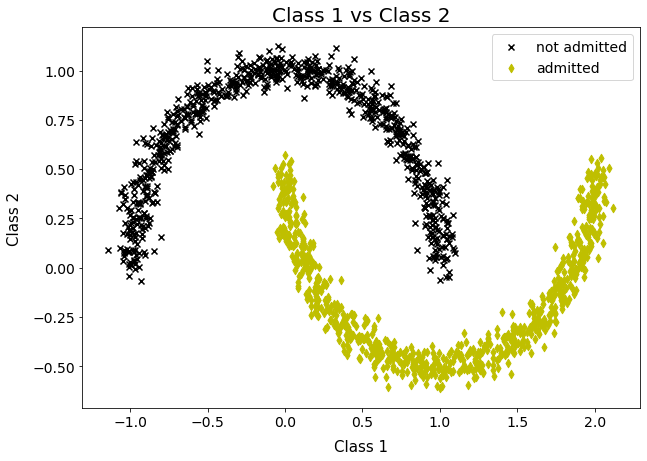

In [80]:
fig, ax = plt.subplots(figsize=(10,7))

# Divide the dataset as negatives and positives.
dataset = np.c_[x,y]
negatives = dataset[dataset[:, -1] == 0]
positives = dataset[dataset[:, -1] == 1]

# Make the plot pretty.
ax.set_xlabel("Class 1", fontsize=15, labelpad=10)
ax.set_ylabel("Class 2", fontsize=15, labelpad=10)
ax.set_title("Class 1 vs Class 2", fontsize=20)
ax.tick_params(labelsize=14)

# Plot both negative and positive classes to the same figure.
plot_data(ax, negatives[:, 0], negatives[:, 1], param_dict={"c": "black", "marker": "x", "label": "not admitted"})
plot_data(ax, positives[:, 0], positives[:, 1], param_dict={"c": "y", "marker": "d", "label": "admitted"})
ax.legend(prop={'size': 14});

# Get the decision boundary and plot it within the same figure.

In [71]:
np.linspace(1, 10, 60)

(60,)

In [77]:
y.shape

(1500,)

In [35]:
def plot_data(
    ax,
    data1,
    data2,
    param_dict
):

    ax.scatter(data1, data2, **param_dict)


def get_decision_boundary(
    X,
    thetas,
    is_polynomial=False,
    PolynomialFeatures_instance=None
):
    thetas = thetas.reshape(-1, 1)

    x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    if is_polynomial:
        h = sigmoid(PolynomialFeatures_instance.fit_transform(np.c_[xx1.flatten(), xx2.flatten()]) @ (thetas))

    else:
        constant = np.ones((xx1.flatten().shape[0], 1))
        h = sigmoid(np.c_[constant, xx1.flatten(), xx2.flatten()] @ (thetas))

    h = h.reshape(xx1.shape)

    return xx1, xx2, h

In [ ]:

# W, B = initialise_weights(dimensions)

# initial_weights = W[0]
# initial_weights[0][0] = 0.15
# initial_weights[0][1] = 0.2
# initial_weights[1][0] = 0.25
# initial_weights[1][1] = 0.30
# B[0] = 0.35

# second_set_of_weights = W[1]
# second_set_of_weights[0][0] = 0.4
# second_set_of_weights[0][1] = 0.45
# second_set_of_weights[1][0] = 0.5
# second_set_of_weights[1][1] = 0.55
# B[1] = 0.6

# A, Z = forwardpass(X, W, B)
# J = calculate_error(Y, A[-1])
# W = backpropagation(A, Z, Y, W)